<a href="https://colab.research.google.com/github/0x544852/mlcio/blob/master/week_2/mlcio_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mlcio week2

Financial predictions using 3 different scikit learn algorithms

Data file: https://github.com/0x544852/mlcio/raw/master/week_2/AAPL.csv



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# download yahoo finance data from presaved github repo
url = 'https://github.com/0x544852/mlcio/raw/master/week_2/AAPL.csv'
df = pd.read_csv(url,index_col='Date')
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,51.269413,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.544937,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,52.117188,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.662014,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.578468,98506100


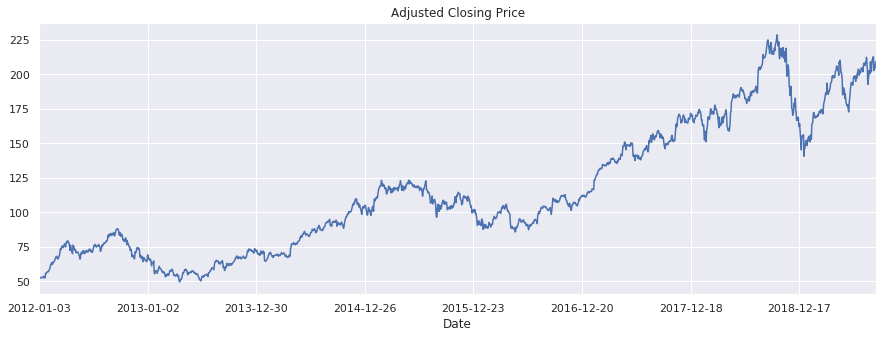

In [0]:
df['Adj Close'].plot(label='AAPL', figsize=(15,5), title='Adjusted Closing Price', grid=True)

In [0]:
# prepare all the data, split into batches and train, test vectors
window_size = 32 
num_samples = len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)
data = df['Adj Close'].values[indices]
X = data[:,:-1]
y = data[:,-1]
split_fraction = 0.8
ind_split = int(split_fraction * num_samples)
X_train = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]



In [0]:
import sklearn
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler

# Train, Predict, Plot for different algorithms
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_ridge = ridge_model.predict(X_test)

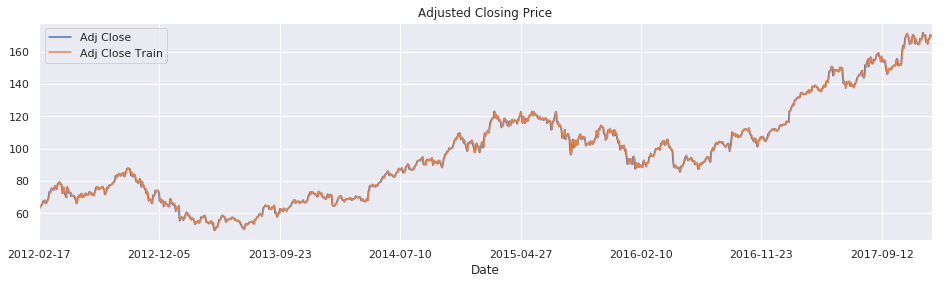

In [0]:
df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_ridge['Adj Close Train'] = y_pred_train_ridge[:-window_size]
df_ridge.plot(label='AAPL', figsize=(16,4), title='Adjusted Closing Price', grid=True)

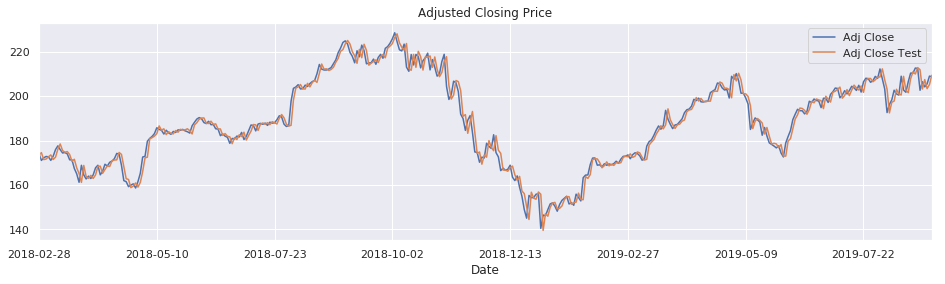

In [0]:
df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[ind_split+window_size:]
df_ridge['Adj Close Test'] = y_pred_ridge
df_ridge.plot(label='AAPL', figsize=(16,4), title='Adjusted Closing Price', grid=True)

In [0]:

lasso_model = linear_model.Lasso(alpha=0.0001)
lasso_model.fit(X_train, y_train)
y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_lasso = lasso_model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1854.1814980183049, tolerance: 146.58968208391718
  positive)


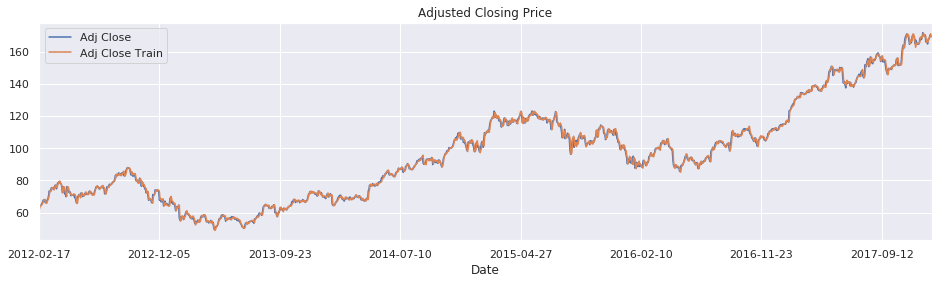

In [0]:
df_lasso = df.copy()
df_lasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso = df_lasso.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_lasso['Adj Close Train'] = y_pred_train_lasso[:-window_size]
df_lasso.plot(label='AAPL', figsize=(16,4), title='Adjusted Closing Price', grid=True)

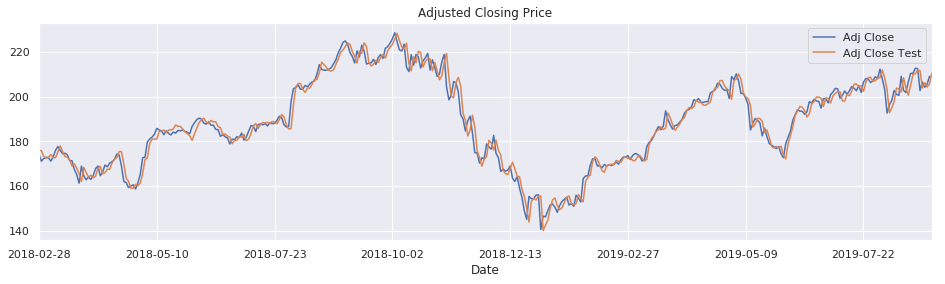

In [0]:
df_lasso = df.copy()
df_lasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso = df_lasso.iloc[ind_split+window_size:]
df_lasso['Adj Close Test'] = y_pred_lasso
df_lasso.plot(label='AAPL', figsize=(16,4), title='Adjusted Closing Price', grid=True)

In [0]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_train_gb = gb_model.predict(X_train)
y_pred_gb = gb_model.predict(X_test)

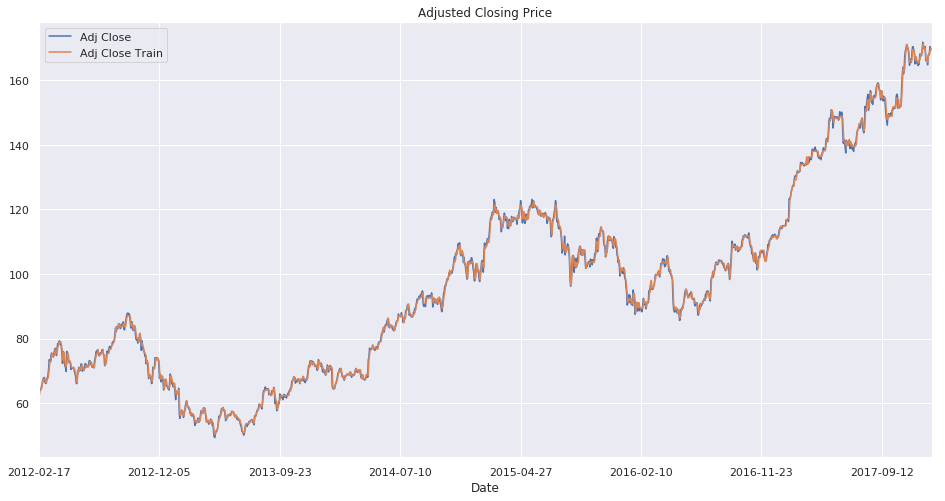

In [0]:
df_gb = df.copy()
df_gb.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_gb = df_gb.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_gb['Adj Close Train'] = y_pred_train_gb[:-window_size]
df_gb.plot(label='AAÜL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

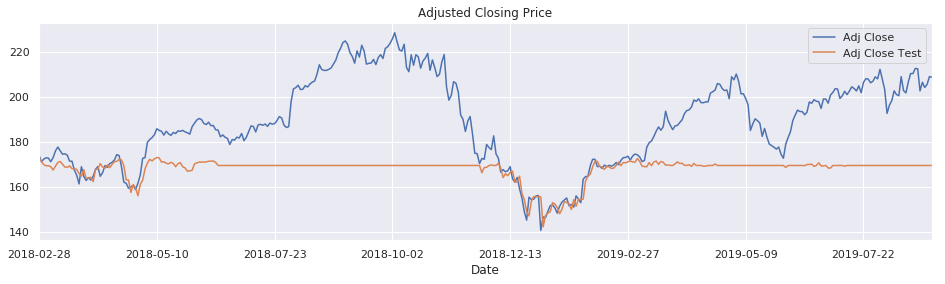

In [0]:
df_gb = df.copy()
df_gb.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_gb = df_gb.iloc[ind_split+window_size:] 
df_gb['Adj Close Test'] = y_pred_gb
df_gb.plot(label='AAPL', figsize=(16,4), title='Adjusted Closing Price', grid=True)